#ESTIMATING BILLBOARD EXPOSURE USING NEGATIVE-BINOMIAL DISTRIBUTION

#VARIABLES:     r,alpha- model parameters
#               data- Number of active consumers
#               t- time period



Function:  probabilities() 			: Calculates the probability of exposure to a given billboard in time period t

In [0]:
from math import log
from matplotlib import pyplot as plt
from scipy.optimize import minimize
import numpy as np

#Probability function
def probabilities(r,alpha):
	p = np.power([alpha / (alpha + 1)],r)
	for t in range(1, 24):
		pt = (r + t - 1) / (t*(alpha+1))*p[t-1]
		p=np.append(p,pt)
	
	return p

Function:   exposure_rates()      	: Calculates the exposure rates of individual consumers

In [0]:

def exposure_rates(data):
	z = []
	for i, x in enumerate(data):
		if i == 0:
			z.append(data[0])
		else:
			z.append(data[i])
	return z

Function:    maximize()               : Maximizes the log likelihood to determine the optimal model parameters

In [0]:
def maximize(data):
	
	func = lambda x: -max_likelihood(x[0], x[1], data)
	x0 = np.array([4, 4])
	k = minimize(func, x0, method='nelder-mead', options={'disp': True})
	return k   	

Function:   distribution()           : Calculates the probability distribution

In [0]:
def distribution(r,alpha,i):
	gl=(np.power(alpha,r)*np.power(i,(r-1))*np.exp(-alpha*i))/np.math.factorial(int((r-1)))
	return gl


Fucntion:  max_likelihood()			: Calculates the log likelihood of the nBD model parameters

In [0]:

#Calculating the maximimum log likelihood
def max_likelihood(r,alpha,data):

	prob = probabilities(r, alpha)
	print(prob[0])
	data=np.array(data)
	um=data*np.log(prob)
	
	final=np.ndarray.sum(um)
	
	return final	

In [0]:
def nbd(data):
	
	log_likelihood=max_likelihood(1.,1.,data)
	k=maximize(data)
	r, alpha = k.x
	print("r is",r)
	print("alpha is",alpha)
	

	expectation=(r*4)/alpha

	print(expectation)
	h=[]
	for i in range(1,11):
		
		g=distribution(r,alpha,i)
		print(g)
		h=np.append(h,g)
	print(h)	

	#Plot
	plt.plot(np.array(range(1,11)), h)
	plt.title('Negative-Binomial Distribution')
	plt.xlabel('lambda')
	plt.ylabel('Function of lambda')
	plt.show()
	return r,alpha

Function Call using sample data 

0.5
0.4096000000000001
0.3917219839139992
0.42558252512166944
0.3748676026461084
0.348531533441583
0.331857021436812
0.29384928792547205
0.24776909095837998
0.17530221975734556
0.13124360944384075
0.050847764822917536
0.003388096946781718
0.035772192452319745
0.0005568729903095432
0.10002015242867018
0.010506457999512
0.06882458137430154
0.023597659415921252
0.032555971378991175
0.020244085698906487
0.04217951792237753
0.026784713062544468
0.03807054772250857
0.041696274385694405
0.03929663298234203
0.03995186582383668
0.033954928887450074
0.038100516506659424
0.039436259769671786
0.04652910807435156
0.04650286896909697
0.05098488783253844
0.042022684508429366
0.05761242659908962
0.07823480836298928
0.09979314086841604
0.3667261245422137
nan
0.2344604458562551
nan
nan
0.12546159384629166
0.08768024251881162
0.11730929785716628
0.08334756372288192
0.16079297291114114
0.16639076926150395
0.1945884243417875
0.23844289358975762
0.19478030125275994
0.19513719029658363
0.17041373328246995
0.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in power
  # This is added back by InteractiveShellApp.init_path()


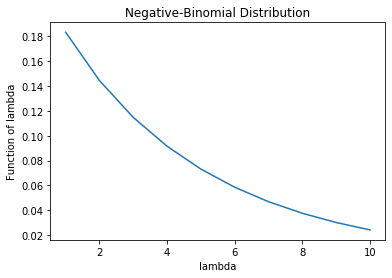

In [0]:
data=[48,37,30,24,20,16,13,11,9,7,6,5,5,3,3,2,2,2,1,1,2,1,1,1]
r,alpha= nbd(data)